In [1]:
import matplotlib.pyplot as plt
import numpy as np

with open('./log.txt', 'r') as f:
    lines = f.readlines()

x = []
y = []
checkpoint = []
AP = []
AP50 = []
AP75 = []
APs = []
APm = []
APl = []
prev = None
for line in lines:
    line = line.split()

    if len(line) == 8 and line[5] == 'checkpoint':
        checkpoint.append(int(line[-1][-11:-4]))

    # if len(line) == 13 and line[0] == '|' and line[1] != 'AP' and line[2] == '|':
    if prev and prev[0] == '|:-----:|:------:|:------:|:-----:|:-----:|:-----:|':
        AP.append(float(line[1]))
        AP50.append(float(line[3]))
        AP75.append(float(line[5]))
        APs.append(float(line[7]))
        APm.append(float(line[9]))
        APl.append(float(line[11]))

    prev = line

    if len(line) > 9 and line[6] == 'iter:':
        x.append(int(line[7]))
        y.append(float(line[9]))

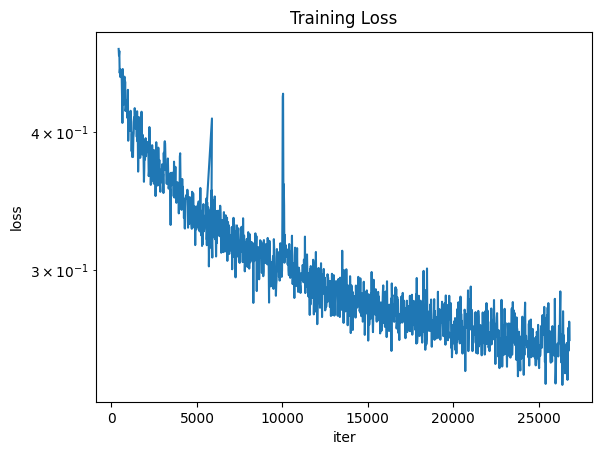

In [2]:
offset = 20
plt.plot(x[offset:], y[offset:])
plt.yscale('log')
plt.title("Training Loss")
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

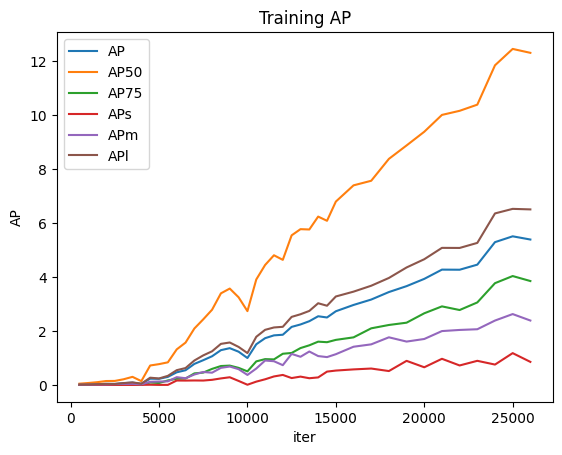

In [3]:
plt.plot(checkpoint, AP, label='AP')
plt.plot(checkpoint, AP50, label='AP50')
plt.plot(checkpoint, AP75, label='AP75')
plt.plot(checkpoint, APs, label='APs')
plt.plot(checkpoint, APm, label='APm')
plt.plot(checkpoint, APl, label='APl')
plt.legend()
plt.title("Training AP")
plt.xlabel('iter')
plt.ylabel('AP')
plt.show()